In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
# choose outcome, either at discharge or discharge - admission
USE_AS_OUTCOME = ['dc', 'delta'][0]
EXCLUDE_THE_OTHER_MEASURE_ADM = True

# total # of features and a list of all feature names

import pandas as pd
import pickle
import numpy as np
from tabulate import tabulate
import json

# always start from loading the CSV file from previous section
df = pd.read_csv('./data/Cleaned files/Cogan_2_5.csv', low_memory=False, index_col='id')

# load splits
with open('./data/Cleaned files/data_splits.json', 'r') as f:
    split_dict = json.load(f)

print("# of train samples:", len(split_dict["train"]))
print("# of eval samples:", len(split_dict["eval"]))
print("# of test samples:", len(split_dict["test"]))

print("# of valid selfcare train samples:", df.loc[split_dict["train"]]['selfcare_measure_delta'].notna().sum())
print("# of valid selfcare eval samples:", df.loc[split_dict["eval"]]['selfcare_measure_delta'].notna().sum())
print("# of valid selfcare test samples:", df.loc[split_dict["test"]]['selfcare_measure_delta'].notna().sum())

print("# of valid mobility train samples:", df.loc[split_dict["train"]]['mobility_measure_delta'].notna().sum())
print("# of valid mobility eval samples:", df.loc[split_dict["eval"]]['mobility_measure_delta'].notna().sum())
print("# of valid mobility test samples:", df.loc[split_dict["test"]]['mobility_measure_delta'].notna().sum())


feature_names = [*df.head()]
feature_dtypes = df.dtypes
print("total # of features:", len(feature_names))

nan_counts = df.isna().sum(axis=0).to_dict()


def tabulate_df(df):
    feature_names = [*df.head()]
    feature_dtypes = df.dtypes
    nan_counts = df.isna().sum(axis=0).to_dict()
    return tabulate([(index, name, feature_dtypes[name], nan_counts[name]) for index, name in enumerate(feature_names)], headers=["Index", "Name", "Dtype", "# of NaNs"], tablefmt="grid")

print(tabulate_df(df))

# load interested predictor and outcome name list
with open('./data/Cleaned files/selected_features.json', 'r') as f:
    selected_feature_dict = json.load(f)
therapy_predictors = selected_feature_dict['therapy_predictors']

predictors = [name for name in df.columns if name not in ['id', 'selfcare_measure_delta', 'mobility_measure_delta', 'selfcare_measure_dc', 'mobility_measure_dc']]


# of train samples: 28625
# of eval samples: 7156
# of test samples: 7157
# of valid selfcare train samples: 28625
# of valid selfcare eval samples: 7156
# of valid selfcare test samples: 7157
# of valid mobility train samples: 28625
# of valid mobility eval samples: 7156
# of valid mobility test samples: 7157
total # of features: 61
+---------+------------------------------------------------+---------+-------------+
|   Index | Name                                           | Dtype   |   # of NaNs |
+=========+================================================+=========+=============+
|       0 | ptindweek1                                     | float64 |           0 |
+---------+------------------------------------------------+---------+-------------+
|       1 | otindweek1                                     | float64 |           0 |
+---------+------------------------------------------------+---------+-------------+
|       2 | slpindweek1                                    | float64 

Plot histograms

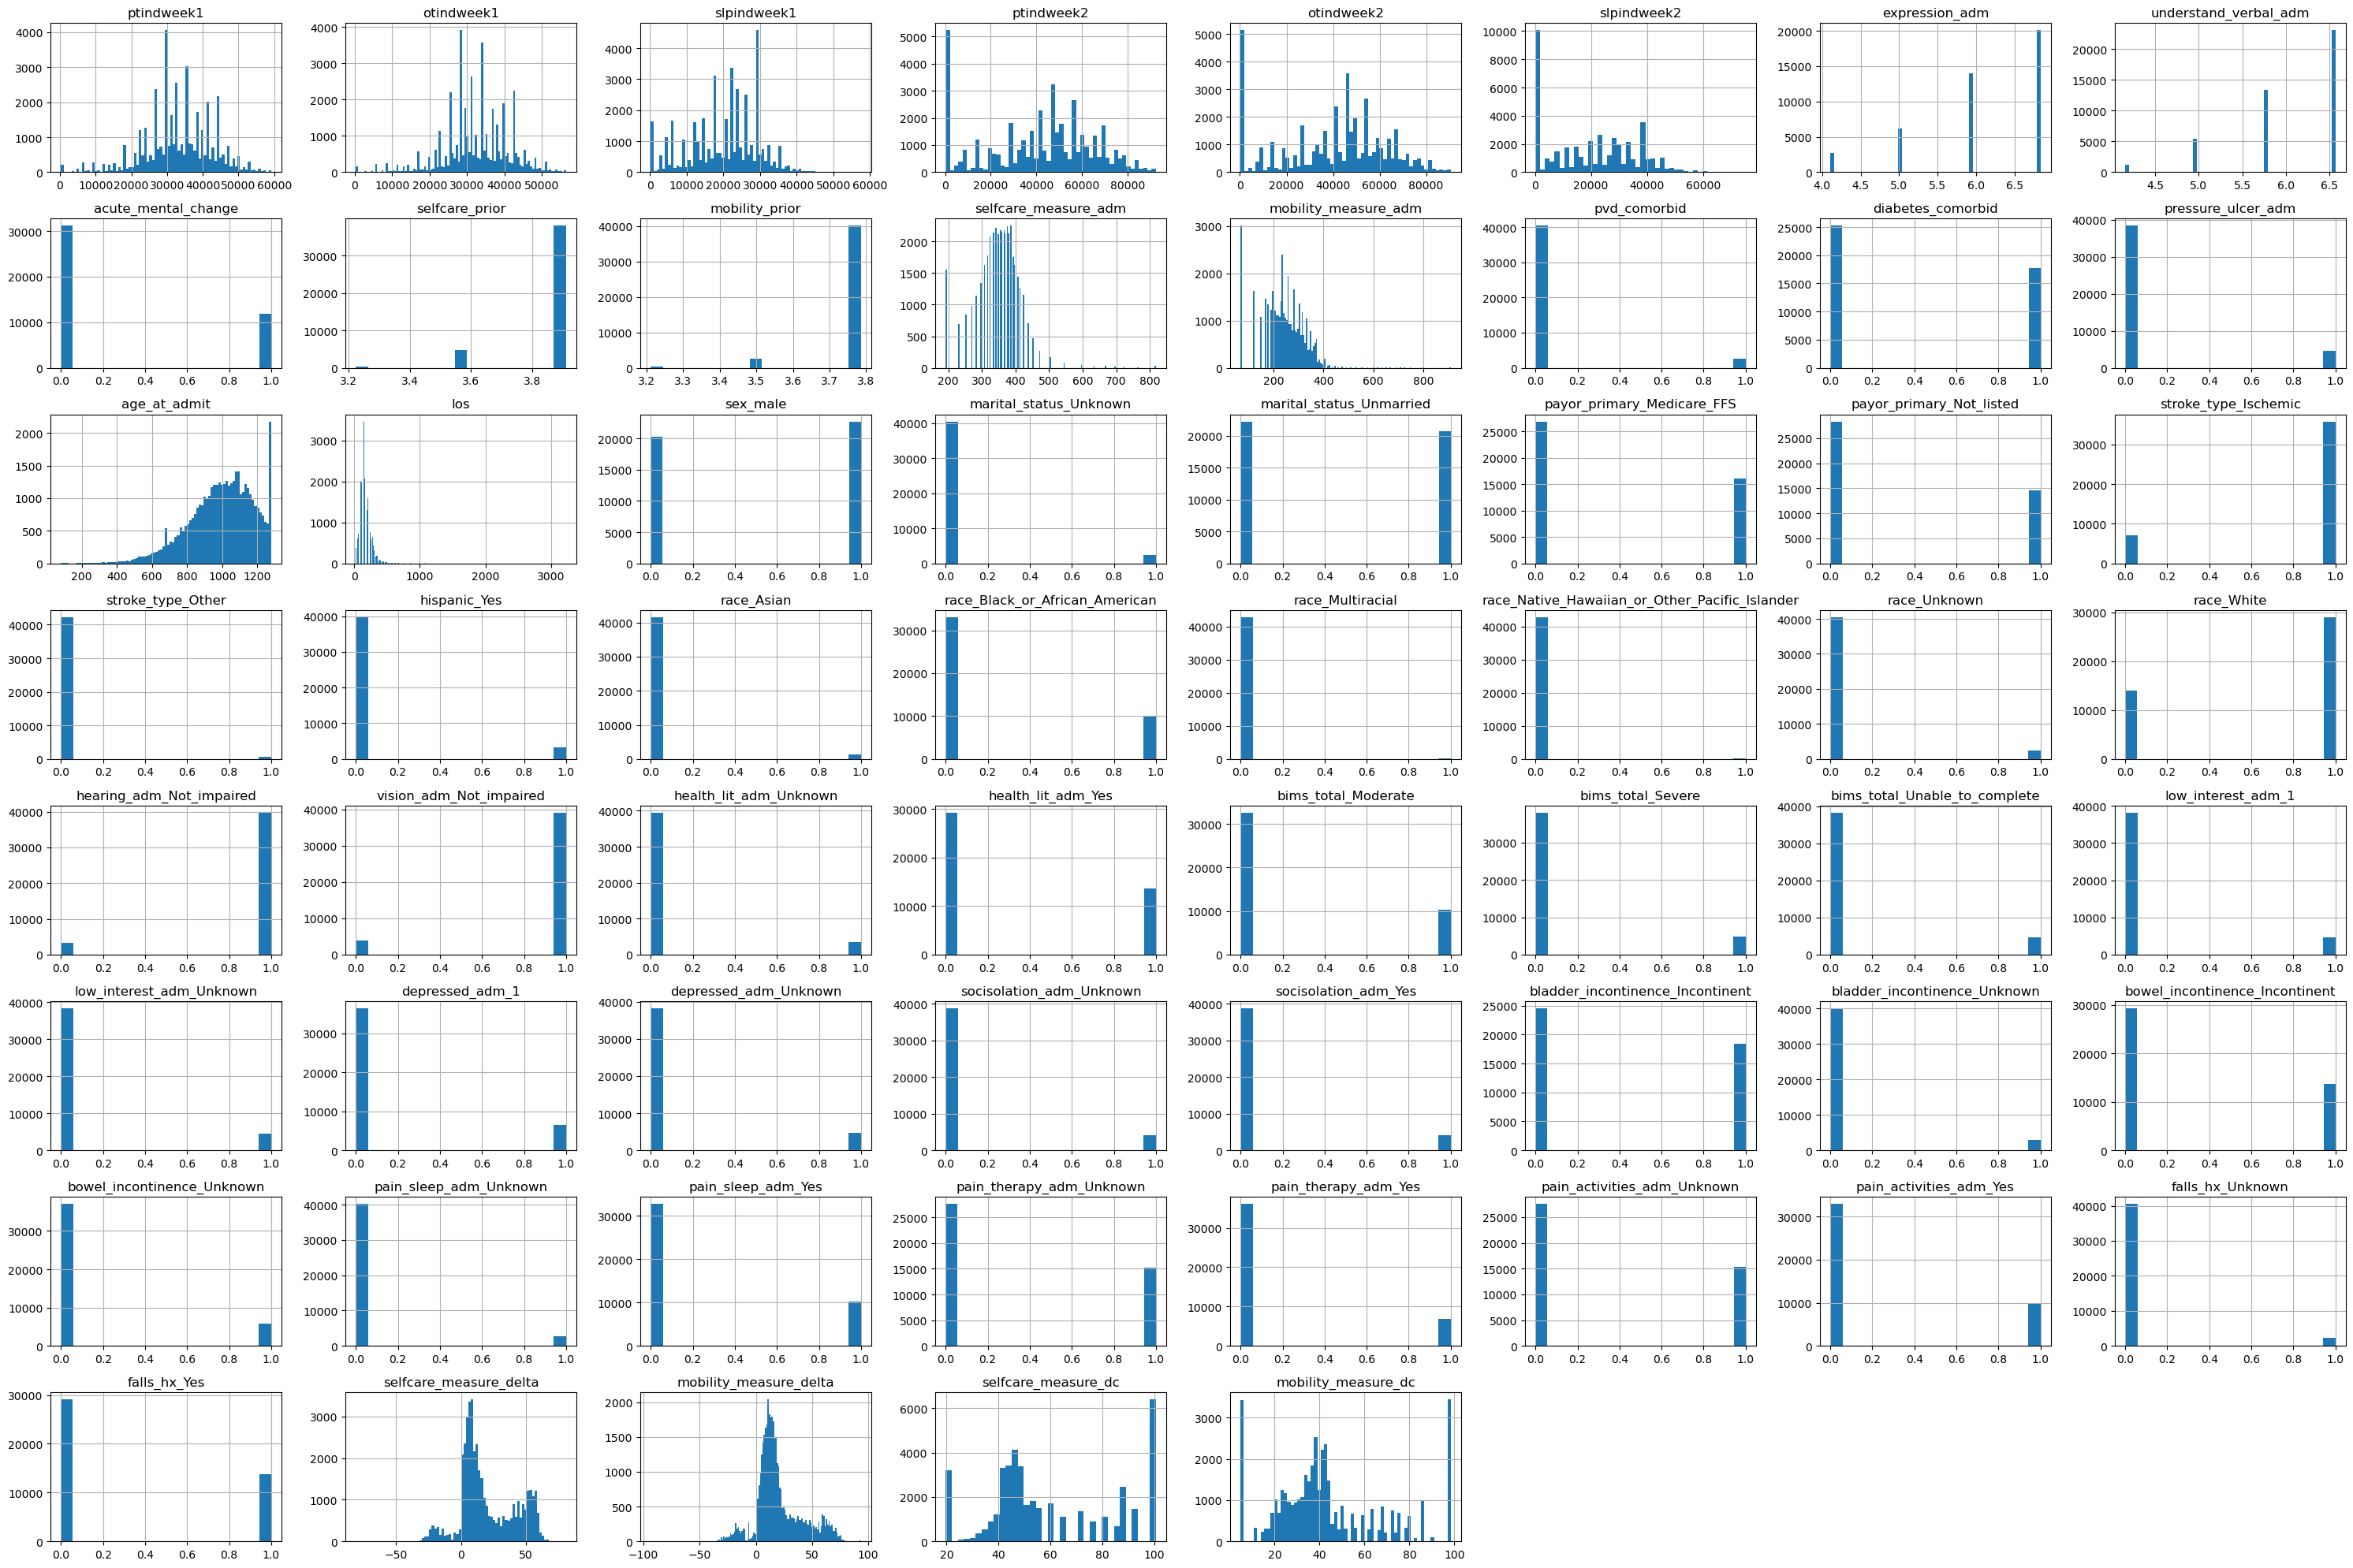

In [5]:
import matplotlib.pyplot as plt


with open('./data/Cleaned files/standardization_params.json', 'r') as f:
    scaling_params = json.load(f)

for varname in scaling_params.keys():
    df[varname] = df[varname] * scaling_params[varname]['std'] + scaling_params[varname]['mean']
df.hist(bins='auto', figsize=(30, 20))
plt.tight_layout()
plt.savefig("histograms.png", dpi=300)
plt.show()